# 09 - Figures, Axes, and Subplots

This lesson goes into a bit more detail about the concepts of Figures, Axes, and Subplots in matplotlib. This is an area of much confusion because it's not always made clear what the difference between a Figure object and axis is, and how to interact with plots. But don't worry! We'll start simple and build-up from there.

This is also a good time to note that Seaborn is actually built on-top of matplotlib. Anything you can do with matplotlib, you can do to seaborn with a little work.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\SS\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('../../Data/diamonds.csv')
df.shape

(53940, 10)

In [3]:
df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Figure Objects

The normal way most people interact with pyplot (the main library of matplotlib) is through the `plt` functions. When you begin plotting anything, the first thing that happens is a `Figure` object is created. 

For instance, when plotting a histogram, it creates a `Figure`, and then draws the set of axes, and finally the histogram. It does all of this at once "under the hood."

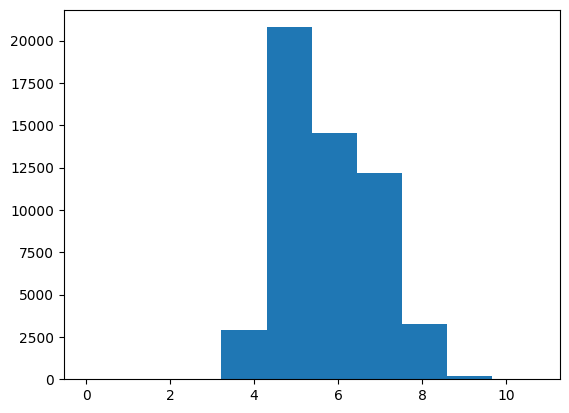

In [4]:
plt.hist(data=df, x='x');

We can start by just creating a figure directly. Note the plotting details describe something is created.

In [5]:
plt.figure(figsize=(4, 3))

<Figure size 400x300 with 0 Axes>

<Figure size 400x300 with 0 Axes>

If we want to go further, we can specifically set axis locations.

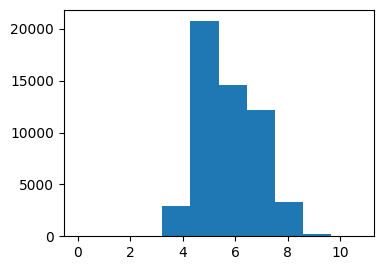

In [6]:
# Create a new figure
fig = plt.figure(figsize=(4, 3))

# The argument of add_axes represents the dimensions [left, bottom, width, height] of the new axes. 
# All quantities are in fractions of figure width and height.
ax = fig.add_axes([.125, .125, .775, .755])
ax.hist(data=df, x='x');

### Sub-plots

Now if you want to create two sub-plots within a `Figure`, you can use the `plt.subplot()` method. This specifies N rows, M columns, and then is used to iterate through each.

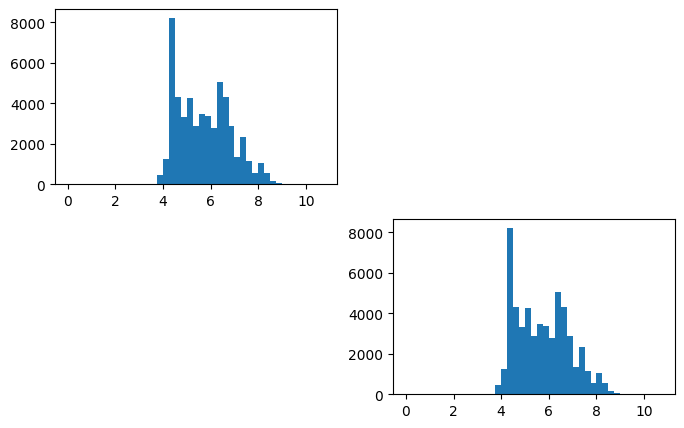

In [7]:
# Resize the chart, and have two plots side-by-side
# set a larger figure size for subplots
plt.figure(figsize = [8, 5]) 

# histogram on left, example of too-large bin size
# 2 row, 2 cols, subplot 1
plt.subplot(2, 2, 1) 
bins = np.arange(0, df['x'].max()+1/4, 1/4)
plt.hist(data=df, x='x', bins=bins);

# histogram on right, example of too-small bin size
plt.subplot(2, 2, 4) # 2 row, 2 cols, subplot 4
bins = np.arange(0, df['x'].max()+1/4, 1/4)
plt.hist(data=df, x='x', bins=bins);

## Axes objects

That said, there is another way to interact with plots, interacting with the specific axis object. When you create a plot, you can use `plt.gca()` (`gca` stands for "get current axis") to retrieve the axis and interact directly with the axis.

Text(0.5, 0, 'My x axis title')

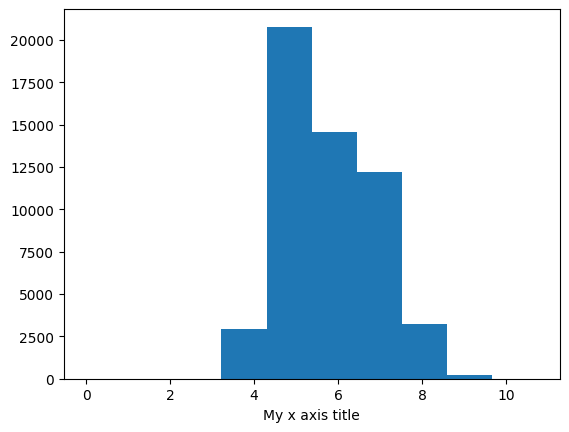

In [8]:
plt.hist(data=df, x='x');
plt.xlabel('My x axis title')

Text(0.5, 0, 'My x axis title')

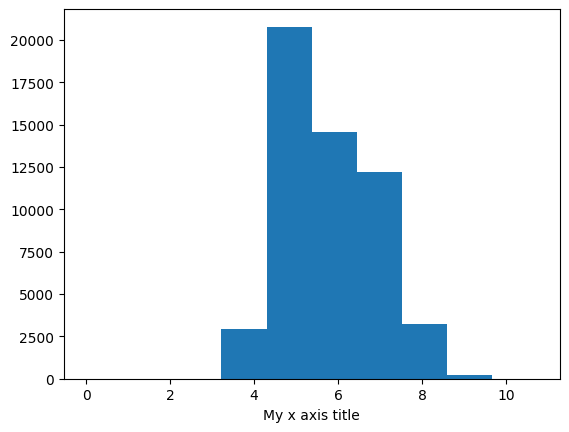

In [9]:
plt.hist(data=df, x='x');
ax = plt.gca()
ax.set_xlabel('My x axis title')

Note the difference is a slightly different calling syntax. One can interact with the figure directly, via `plt`.

If you have a specific axis, you can operate directly on it.

This is convenient: if you want to create subplots, you can act on them individually, and using `plt.subplots()` you can operate at them in any order you want. Note the syntax is N rows, M columns, as before.

Note you can specify the axis to plot on in Seaborn calls.

<Axes: xlabel='clarity', ylabel='count'>

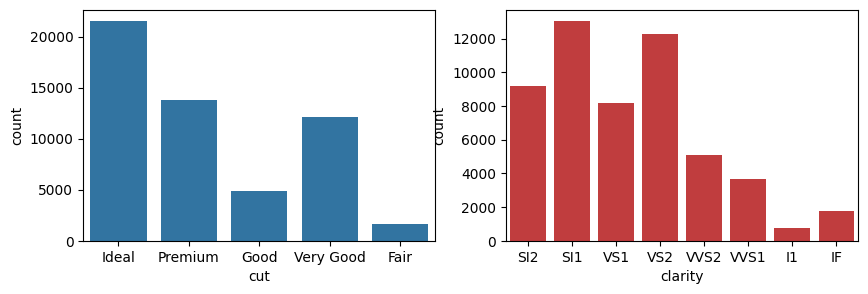

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,3))
sns.countplot(data=df, x='cut', color='tab:blue', ax=ax1)
sns.countplot(data=df, x='clarity', color='tab:red', ax=ax2)

Alternatively, seaborn typically returns the axis so you can quickly operate on it to change the axis or something.

Text(0.5, 0, 'My x axis label!')

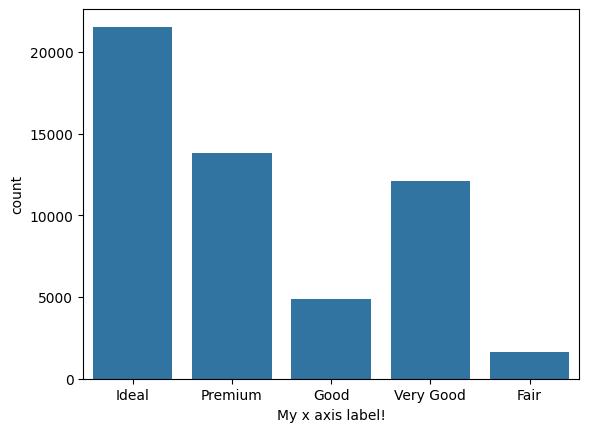

In [11]:
ax = sns.countplot(data=df, x='cut', color='tab:blue')
ax.set_xlabel('My x axis label!')